#UFPB

##Trabalho de Conclusão de Disciplina

### Aluno: **Mariano Rodrigues da Silva Neto** 

### Curso: Ciências Atuariais 

### Grupo de Dados relativo a acidentes de mortos e feridos no trânsito da Catalunha   

# Introdução 



O presente relatório tem o seguinte tema:

** Estatísticas descritiva das medidas de dispersões do número de vítimas no trânsito da (Catalunha 2010/20**

Para isso, utilizou o base de dados os passageiros do titanic presente no kaggle (https://www.kaggle.com/datasets/jordigarciacastillon/road-traffic-injuries-deaths-catalonia-201020). 

Dessa forma, o objetivo desse relatório é responder as seguintes perguntas:


*  Como estão as medidas de dispersão das vítimas no trânsito da Catalunha,

# Desenvolvimento

##Leitura do banco de dados e primeiras observações

In [1]:
#Importar as bibliotecas que serão utilizadas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Ler um arquivo em formato xlsx e salvar na variavel dados 
dados = pd.read_excel('amvc.xlsx')

In [3]:
#Ler as informações de cima do banco de dados
dados.head()

,Any,dat,nomMun,nomDem,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS,F_VICTIMES,F_BICICLETES_IMPLICADES,F_MOTOCICLETES_IMPLICADES,C_VELOCITAT_VIA
0,2010,2010-01-25,CANOVES I SAMALUS,Barcelona,0,1,0,1,0,0,100.0
1,2010,2010-10-31,LLEIDA,Lleida,0,1,3,4,0,0,40.0
2,2010,2010-05-17,FORNELLS DE LA SELVA,Girona,1,0,2,3,0,0,80.0
3,2010,2010-08-21,BARCELONA,Barcelona,0,2,7,9,0,0,100.0
4,2010,2010-05-07,BADALONA,Barcelona,0,1,0,1,0,1,100.0


In [4]:
#Ler as informações de baixo do banco de dados
dados.tail()

,Any,dat,nomMun,nomDem,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS,F_VICTIMES,F_BICICLETES_IMPLICADES,F_MOTOCICLETES_IMPLICADES,C_VELOCITAT_VIA
16769,2018,2018-11-20,BARCELONA,Barcelona,0,1,1,2,1,1,100.0
16770,2018,2018-12-03,CASTELLVI DE ROSANES,Barcelona,0,1,0,1,0,0,100.0
16771,2018,2018-09-30,"VENDRELL, EL",Tarragona,0,1,0,1,0,0,40.0
16772,2018,2018-04-04,VIVER I SERRATEIX,Barcelona,0,1,0,1,1,0,50.0
16773,2018,2018-04-19,MATARO,Barcelona,0,1,0,1,0,0,NaN


In [5]:
#Informações sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16774 entries, 0 to 16773
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Any                        16774 non-null  int64         
 1   dat                        16774 non-null  datetime64[ns]
 2   nomMun                     16774 non-null  object        
 3   nomDem                     16774 non-null  object        
 4   F_MORTS                    16774 non-null  int64         
 5   F_FERITS_GREUS             16774 non-null  int64         
 6   F_FERITS_LLEUS             16774 non-null  int64         
 7   F_VICTIMES                 16774 non-null  int64         
 8   F_BICICLETES_IMPLICADES    16774 non-null  int64         
 9   F_MOTOCICLETES_IMPLICADES  16774 non-null  int64         
 10  C_VELOCITAT_VIA            14654 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage:

##Limpeza do banco de dados

#####Nesse momento o objetivo é analisar variáveis com relações nos acidentes de trânsito que envolvam bicicletas,motocicleta e as vítimas, em vistude disso , serão retiradas colunas que não colaboraram com este intuito. Desse modo, foram retiradas as colunas de data (dia/mês/ano) e nome Demográfico (relativo à região). 

In [9]:
# Verificando se existe caso duplicado
sum(dados.duplicated())

191

In [10]:
# Limpar algumas colunas que não serão utilizadas: 
acidentes = dados.drop(['nomDem','dat'], axis=1)
acidentes

,Any,nomMun,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS,F_VICTIMES,F_BICICLETES_IMPLICADES,F_MOTOCICLETES_IMPLICADES,C_VELOCITAT_VIA
0,2010,CANOVES I SAMALUS,0,1,0,1,0,0,100.0
1,2010,LLEIDA,0,1,3,4,0,0,40.0
2,2010,FORNELLS DE LA SELVA,1,0,2,3,0,0,80.0
3,2010,BARCELONA,0,2,7,9,0,0,100.0
4,2010,BADALONA,0,1,0,1,0,1,100.0
...,...,...,...,...,...,...,...,...,...
16769,2018,BARCELONA,0,1,1,2,1,1,100.0
16770,2018,CASTELLVI DE ROSANES,0,1,0,1,0,0,100.0
16771,2018,"VENDRELL, EL",0,1,0,1,0,0,40.0
16772,2018,VIVER I SERRATEIX,0,1,0,1,1,0,50.0


#####Foi encontrado caso duplicado, nesse caso é normal, levando em consideração o objeto de estudo, além disso, já foi realizada a retirada das colunas que não serão utilizadas, diante disso, pode-se encerrar a limpeza dos dados e começar a análise.

##Análise de dados

In [11]:
#Estatísticas dos dados
acidentes.describe()

,Any,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS,F_VICTIMES,F_BICICLETES_IMPLICADES,F_MOTOCICLETES_IMPLICADES,C_VELOCITAT_VIA
count,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,14654.000000
mean,2013.897580,0.139919,1.003219,0.407535,1.550674,0.082926,0.392512,136.754402
std,2.567239,0.406867,0.540928,0.988399,1.225059,0.317953,0.536160,209.862794
min,2010.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,80.000000
50%,2014.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,100.000000
75%,2016.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,100.000000
max,2018.000000,13.000000,23.000000,22.000000,49.000000,8.000000,7.000000,999.000000


In [14]:
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16774 entries, 0 to 16773
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Any                        16774 non-null  int64  
 1   nomMun                     16774 non-null  object 
 2   F_MORTS                    16774 non-null  int64  
 3   F_FERITS_GREUS             16774 non-null  int64  
 4   F_FERITS_LLEUS             16774 non-null  int64  
 5   F_VICTIMES                 16774 non-null  int64  
 6   F_BICICLETES_IMPLICADES    16774 non-null  int64  
 7   F_MOTOCICLETES_IMPLICADES  16774 non-null  int64  
 8   C_VELOCITAT_VIA            14654 non-null  float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.2+ MB


In [18]:
#Conferir os nomes das planilhas do arquivo excel
dados.keys()

Index(['Any', 'dat', 'nomMun', 'nomDem', 'F_MORTS', 'F_FERITS_GREUS',
       'F_FERITS_LLEUS', 'F_VICTIMES', 'F_BICICLETES_IMPLICADES',
       'F_MOTOCICLETES_IMPLICADES', 'C_VELOCITAT_VIA'],
      dtype='object')

#Medidas de dispersão 

#####As medidas de dispersão auxiliam as medidas de tendência central a descrever o conjunto de dados adequados. Indicam se os dados estão, ou não, próximos um dos outros.



	

####**Amplitude total**

#####A amplitude total de um conjunto de dados é a diferença entre o maior e o menor valor observado


In [45]:
# Maior valor de acidentes com motocicletas 
acidentes['F_VICTIMES'].max() - acidentes['F_VICTIMES'].min()


48

#####**A amplitude Interquatilica**

####A amplitude interquartílica é a diferença entre o terceiro e o primeiro quartil. Esta medida é mais estável que a amplitude total por não considerar os valores mais extremos

In [33]:
acidentes['F_VICTIMES'].describe()

count    16774.000000
mean         1.550674
std          1.225059
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         49.000000
Name: F_VICTIMES, dtype: float64

In [34]:
acidentes['F_VICTIMES'].describe()[6:7].values - acidentes['F_VICTIMES'].describe()[4:5].values

array([1.])

#### com esse valor de array de 1., a amplitude se torna menos sensível aos outlier, devidos o ajuste no quartil. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


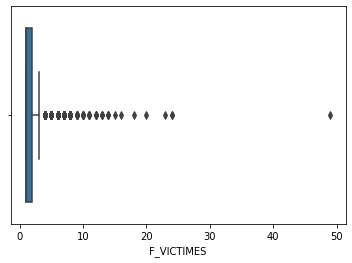

In [28]:
sns.boxplot(acidentes['F_VICTIMES'])

#### com esse valor de array, a amplitude se torna menos sensível aos outlier

### **Variância**

##### Uma medida de dispersão que mostra quão distante os valores estão da média. 


In [35]:
acidentes['F_VICTIMES'].var()

1.5007707260253806

###**Desvio Padrão**

##### É simplesmente o resultado positivo da raiz quadrada da variância. 

In [36]:
acidentes['F_VICTIMES'].std()

1.2250594785664004

###**Medidas de Assimetria**



In [42]:
# Esse comando nos ajuda a descobrir se os dados são simétricos, assimétrico negativo ou positivo.
acidentes['F_VICTIMES'].skew()

7.474354668893097

###### Levando em consideração a variável escolhida, além do valor de 7.47 no teste, por ser maior que zero ela é assimétrica positiva. 

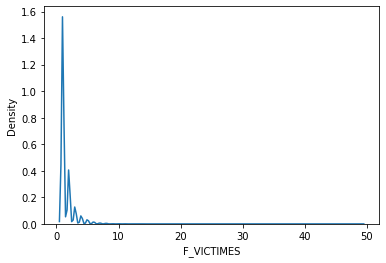

In [43]:
sns.kdeplot(acidentes['F_VICTIMES']);

###**Medidas de Curtose**



In [44]:
acidentes['F_VICTIMES'].kurtosis()

170.28644408799693

### Em virtude do valor 170.28 essa medida se mostra como Leptocúrtica, quando a distribuição apresenta uma curva ou frequência bastante fechada, com os dados fortemente concentrados em torno do seu eixo, consoante o gráfico acima. 

#Conclusão


### Analisando os dados da amostra, conseguimos utilizar as medidas de dispersão para conseguir saber como os dados estão distribuídos e quão distante ele pode ser da média, após analisar as vítimas, eles demonstram uma assimétria positiva, além de uma medida leptocúrtica. 